In [1]:
from keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cvxopt.solvers
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [2]:
def compute_w(multipliers, X, y):
    return np.sum(multipliers[i] * y[i] * X[i] for i in range(len(y)))

In [3]:
def compute_b(w, X, y):
    return np.sum([y[i] - np.dot(w, X[i].T) for i in range(len(X))])/len(X)

In [4]:
def SVM(X,y):
    m = X.shape[0]
    K = np.array([np.dot(X[i].T, X[j])
              for i in range(m)
              for j in range(m)]).reshape((m, m))
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(-1 * np.ones(m))
    A = cvxopt.matrix(y, (1, m))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.diag(-1 * np.ones(m)))
    h = cvxopt.matrix(np.zeros(m))
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    multipliers = np.ravel(solution['x'])
    has_positive_multiplier = multipliers > 1e-07
    sv_multipliers = multipliers[has_positive_multiplier]
    support_vectors = X[has_positive_multiplier]
    support_vectors_y = y[has_positive_multiplier]
    w = compute_w(multipliers, X, y)
    w_from_sv = compute_w(sv_multipliers, support_vectors, support_vectors_y)
    b = compute_b(w, support_vectors, support_vectors_y)
    return w_from_sv,b

In [5]:
def reform_X_and_y(num,flatten_data_x,length):
    reformed_train_y = np.zeros((60000,1))
    reformed_test_y =  np.zeros((10000,1))
    for i in range(len(train_X)):
        if train_y[i] == num:
           reformed_train_y[i] = -1
        else:
           reformed_train_y[i] = 1
    for i in range(len(test_X)):
        if train_y[i] == num:
           reformed_test_y[i] = -1
        else:
           reformed_test_y[i] = 1
    X, y = flatten_data_x[0:length], reformed_train_y[0:length]
    y = y.astype(np.double)

    return X,y

In [6]:
def predict(input,Ws,bs):
    decision_list = [ np.dot(Ws[0].T,input)+bs[0]
                     ,np.dot(Ws[1].T,input)+bs[1]
                     ,np.dot(Ws[2].T,input)+bs[2]
                     ,np.dot(Ws[3].T,input)+bs[3]
                     ,np.dot(Ws[4].T,input)+bs[4]
                     ,np.dot(Ws[5].T,input)+bs[5]
                     ,np.dot(Ws[6].T,input)+bs[6]
                     ,np.dot(Ws[7].T,input)+bs[7]
                     ,np.dot(Ws[8].T,input)+bs[8]
                     ,np.dot(Ws[9].T,input)+bs[9]
                     ]
    return np.argmin(decision_list)

In [7]:
def show_confusion_matrix(data_x,data_y,Ws,bs):
    prediction = np.empty(len(data_x), dtype = int)
    actual = test_y
    r = 0
    for i in range(len(data_x)):
        pred = predict(data_x[i],Ws,bs)
        prediction[i] = pred
        if(predict(data_x[i],Ws,bs) == data_y[i]):
           r +=1
    print('accuracy is: ' + str(r/len(data_x)))

    cm_A = confusion_matrix(data_y,prediction)
    sns.heatmap(cm_A,
            annot=True,
            fmt='g',
            xticklabels=['0','1','2','3','4','5','6','7','8','9'],
            yticklabels=['0','1','2','3','4','5','6','7','8','9'])
    plt.ylabel('Actual',fontsize=13)
    plt.xlabel('Prediction',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()

In [8]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
flatten_train_x = np.zeros((60000,784))
flatten_test_x = np.zeros((10000,784))
for i in range(len(train_X)):
    flatten_train_x[i] = train_X[i].flatten().reshape((784,))
for i in range(len(test_X)):
    flatten_test_x[i] = test_X[i].flatten().reshape((784,))

length = 1000
X,y = reform_X_and_y(0,flatten_train_x,length)
W0,b0 = SVM(X,y)
X,y = reform_X_and_y(1,flatten_train_x,length)
W1,b1 = SVM(X,y)
X,y = reform_X_and_y(2,flatten_train_x,length)
W2,b2 = SVM(X,y)
X,y = reform_X_and_y(3,flatten_train_x,length)
W3,b3 = SVM(X,y)
X,y = reform_X_and_y(4,flatten_train_x,length)
W4,b4 = SVM(X,y)
X,y = reform_X_and_y(5,flatten_train_x,length)
W5,b5 = SVM(X,y)
X,y = reform_X_and_y(6,flatten_train_x,length)
W6,b6 = SVM(X,y)
X,y = reform_X_and_y(7,flatten_train_x,length)
W7,b7 = SVM(X,y)
X,y = reform_X_and_y(8,flatten_train_x,length)
W8,b8 = SVM(X,y)
X,y = reform_X_and_y(9,flatten_train_x,length)
W9,b9 = SVM(X,y)
Ws = [W0,W1,W2,W3,W4,W5,W6,W7,W8,W9]
bs = [b0,b1,b2,b3,b4,b5,b6,b7,b8,b9]

     pcost       dcost       gap    pres   dres
 0: -2.9831e+01 -5.2637e+01  3e+03  5e+01  2e+00
 1: -8.5795e+00 -2.1663e+00  3e+02  6e+00  2e-01
 2: -5.7278e-01 -8.0618e-02  2e+01  4e-01  1e-02
 3: -3.9947e-02 -1.2678e-02  2e+00  3e-02  1e-03
 4: -6.6399e-03 -3.3145e-03  2e-01  4e-03  1e-04
 5: -1.2240e-03 -9.6388e-04  3e-02  5e-04  2e-05
 6: -2.6559e-04 -3.0897e-04  6e-03  8e-05  3e-06
 7: -9.6442e-05 -9.7014e-05  1e-03  1e-05  5e-07
 8: -3.1566e-05 -4.3749e-05  2e-04  2e-06  8e-08
 9: -1.4680e-05 -2.7308e-05  3e-05  2e-07  8e-09
10: -1.6199e-05 -2.1036e-05  8e-06  5e-08  2e-09
11: -1.7699e-05 -1.9627e-05  2e-06  7e-09  3e-10
12: -1.8795e-05 -1.9244e-05  5e-07  7e-11  3e-12
13: -1.9140e-05 -1.9183e-05  4e-08  2e-12  7e-14
Optimal solution found.


<ipython-input-2-8abcfc025df5>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(multipliers[i] * y[i] * X[i] for i in range(len(y)))


     pcost       dcost       gap    pres   dres
 0: -5.5080e+01 -1.1920e+02  4e+03  6e+01  2e+00
 1: -4.8177e+01 -2.1592e+01  9e+02  1e+01  4e-01
 2: -1.5258e+00 -1.6087e-01  4e+01  5e-01  2e-02
 3: -6.1263e-02 -2.6717e-02  2e+00  3e-02  9e-04
 4: -7.6656e-03 -6.9838e-03  3e-01  3e-03  1e-04
 5: -1.8291e-03 -1.8831e-03  5e-02  5e-04  2e-05
 6: -4.6141e-04 -7.0084e-04  9e-03  8e-05  3e-06
 7: -1.9892e-04 -2.9995e-04  2e-03  2e-05  7e-07
 8: -9.8068e-05 -1.4841e-04  6e-04  5e-06  2e-07
 9: -5.8183e-05 -9.0697e-05  2e-04  1e-06  4e-08
10: -5.2313e-05 -6.6639e-05  3e-05  1e-07  5e-09
11: -5.5887e-05 -6.2842e-05  1e-05  3e-08  1e-09
12: -5.9548e-05 -6.1320e-05  2e-06  3e-09  1e-10
13: -6.0796e-05 -6.1055e-05  3e-07  1e-20  2e-14
14: -6.1022e-05 -6.1028e-05  7e-09  5e-21  2e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.5132e+01 -1.0375e+02  4e+03  5e+01  2e+00
 1: -2.6656e+01 -1.1924e+01  7e+02  9e+00  4e-01
 2: -1.2306e+00 -2.0864e-01  4e+01  5e-01  2e-0

training set
accuracy is: 0.80825


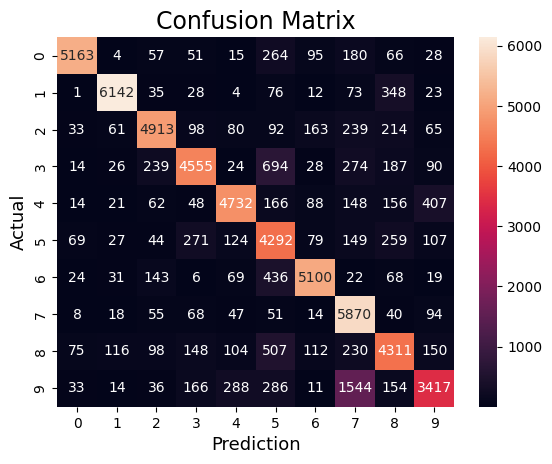

In [9]:
print('training set')
show_confusion_matrix(flatten_train_x,train_y,Ws,bs)

test set
accuracy is: 0.8097


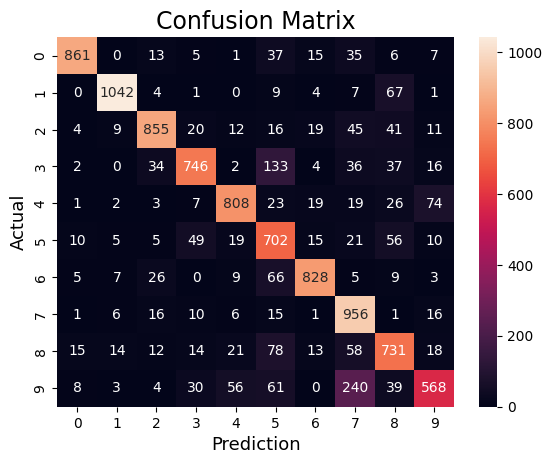

In [10]:
print('test set')
show_confusion_matrix(flatten_test_x,test_y,Ws,bs)

In [11]:
def covariance(x):
    return (x.T @ x)/(x.shape[0]-1)

In [12]:
def PCA(K,x):
    cov_mat = covariance(x)
    eig_vals, eig_vecs = eig(cov_mat)
    eig_vals = eig_vals.real
    eig_vecs = eig_vecs.real
    max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
    signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
    eig_vecs = eig_vecs*signs[np.newaxis,:]
    eig_vecs = eig_vecs.T

    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:])
     for i in range(len(eig_vals))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    eig_vals_sorted = np.array([x[0] for x in eig_pairs])
    eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

    W = eig_vecs_sorted[:K, :]
    X_proj = x.dot(W.T)

    return X_proj

In [13]:
X_train_proj = PCA(K=200,x=flatten_train_x)
X_test_proj = PCA(K=200,x=flatten_test_x)
length = 1000
X,y = reform_X_and_y(0,X_train_proj,length)
W0_pca,b0_pca = SVM(X,y)
X,y = reform_X_and_y(1,X_train_proj,length)
W1_pca,b1_pca = SVM(X,y)
X,y = reform_X_and_y(2,X_train_proj,length)
W2_pca,b2_pca = SVM(X,y)
X,y = reform_X_and_y(3,X_train_proj,length)
W3_pca,b3_pca = SVM(X,y)
X,y = reform_X_and_y(4,X_train_proj,length)
W4_pca,b4_pca = SVM(X,y)
X,y = reform_X_and_y(5,X_train_proj,length)
W5_pca,b5_pca = SVM(X,y)
X,y = reform_X_and_y(6,X_train_proj,length)
W6_pca,b6_pca = SVM(X,y)
X,y = reform_X_and_y(7,X_train_proj,length)
W7_pca,b7_pca = SVM(X,y)
X,y = reform_X_and_y(8,X_train_proj,length)
W8_pca,b8_pca = SVM(X,y)
X,y = reform_X_and_y(9,X_train_proj,length)
W9_pca,b9_pca = SVM(X,y)
Ws_pca = [W0_pca,W1_pca,W2_pca,W3_pca,W4_pca,W5_pca,W6_pca,W7_pca,W8_pca,W9_pca]
bs_pca = [b0_pca,b1_pca,b2_pca,b3_pca,b4_pca,b5_pca,b6_pca,b7_pca,b8_pca,b9_pca]

     pcost       dcost       gap    pres   dres
 0: -7.2189e+01 -1.5695e+02  4e+03  6e+01  2e+00
 1: -8.7085e+01 -5.4196e+01  1e+03  2e+01  6e-01
 2: -4.6134e+00 -1.4080e-01  6e+01  8e-01  3e-02
 3: -4.6785e-02 -2.3505e-04  6e-01  8e-03  3e-04
 4: -7.9409e-04 -2.1576e-04  1e-02  1e-04  5e-06
 5: -1.3985e-04 -1.1843e-04  2e-03  2e-05  8e-07
 6: -4.0510e-05 -5.4993e-05  4e-04  4e-06  2e-07
 7: -1.8546e-05 -3.4321e-05  7e-05  7e-07  3e-08
 8: -1.6858e-05 -2.4889e-05  2e-05  1e-07  4e-09
 9: -1.8986e-05 -2.2350e-05  4e-06  1e-08  5e-10
10: -2.0714e-05 -2.1861e-05  1e-06  1e-21  1e-14
11: -2.1535e-05 -2.1700e-05  2e-07  2e-21  1e-14
12: -2.1664e-05 -2.1681e-05  2e-08  3e-21  1e-14
Optimal solution found.


<ipython-input-2-8abcfc025df5>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(multipliers[i] * y[i] * X[i] for i in range(len(y)))


     pcost       dcost       gap    pres   dres
 0: -9.9956e+01 -2.8179e+02  5e+03  6e+01  3e+00
 1: -1.9243e+02 -2.1668e+02  2e+03  2e+01  1e+00
 2: -4.2926e+01 -6.7461e+00  3e+02  3e+00  2e-01
 3: -5.6540e-01 -1.9701e-03  4e+00  4e-02  2e-03
 4: -7.2765e-03 -7.7596e-04  6e-02  5e-04  3e-05
 5: -8.8261e-04 -5.5768e-04  7e-03  7e-05  3e-06
 6: -2.6965e-04 -2.9968e-04  2e-03  2e-05  1e-06
 7: -1.2124e-04 -1.7363e-04  8e-04  6e-06  3e-07
 8: -7.3307e-05 -1.1100e-04  2e-04  1e-06  6e-08
 9: -6.7358e-05 -9.2550e-05  8e-05  4e-07  2e-08
10: -6.4791e-05 -8.2708e-05  2e-05  2e-08  1e-09
11: -7.2507e-05 -7.9821e-05  8e-06  7e-09  4e-10
12: -7.6691e-05 -7.8653e-05  2e-06  1e-20  4e-14
13: -7.8163e-05 -7.8420e-05  3e-07  7e-21  4e-14
14: -7.8384e-05 -7.8390e-05  6e-09  1e-20  4e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1893e+02 -3.0915e+02  5e+03  6e+01  3e+00
 1: -2.8140e+02 -3.2187e+02  2e+03  3e+01  1e+00
 2: -9.5945e+01 -2.1004e+01  5e+02  5e+00  2e-0

training set after PCA with k=200
accuracy is: 0.8009


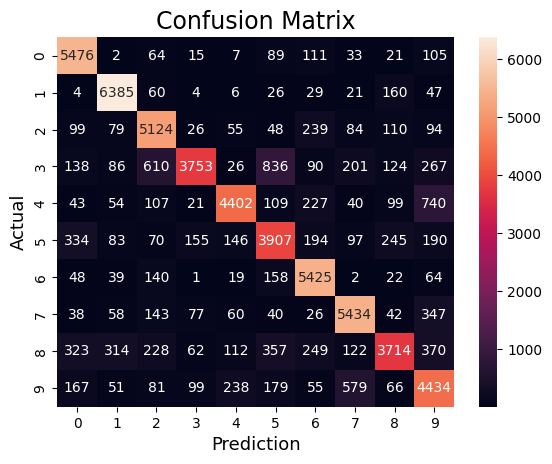

In [14]:
print('training set after PCA with k=200')
show_confusion_matrix(X_train_proj,train_y,Ws_pca,bs_pca)

test set after PCA with k=200
accuracy is: 0.4326


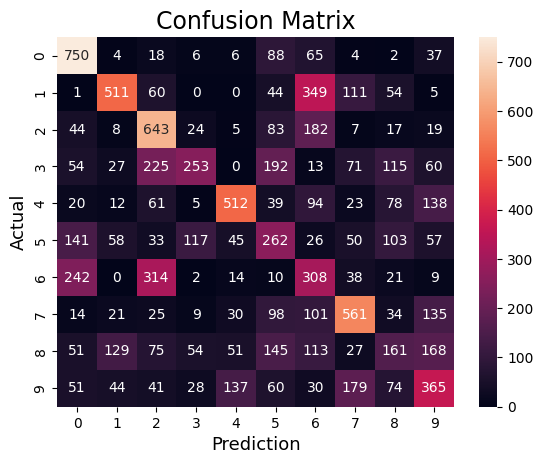

In [15]:
print('test set after PCA with k=200')
show_confusion_matrix(X_test_proj,test_y,Ws_pca,bs_pca)